# Imports

In [1]:
import time
import os,pickle
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload

from common import numerical_recipes as numrec
from common.baseclasses import AWA
from common.misc import autopickle
from common.plotting import bluered_colors

from NearFieldOptics import Materials as M

import ProbeCavityEigenfields as PCE
from ProbeCavityEigenfields import RotationalMoM as RotMOM
from ProbeCavityEigenfields import ProbeSpectroscopy as PS
#from ProbeCavityEigenfields import RotationalMoM_new as RotMOMnew

#import numba
#eload(np) 
#reload(numba) 
#print('Numba version:',numba.__version__)
print('Numpy version:',np.__version__) # version 0.6 appears not compatible with numpy 1.22 - 1.24

<plotting>:
	Registered colormaps "Warm" and "Warm_r"...
<plotting>:
	Registered colormaps "vanheum" and "vanheum_r"...
<plotting>:
	Registered colormaps "NT-MDT" and "NT-MDT_r"...
<plotting>:
<plotting>:
	Registered colormaps "jingdi" and "jingdi_r"...
<plotting>:
	Registered colormaps "Halcyon" and "Halcyon_r"...
<plotting>:
	Registered colormaps "Cold" and "Cold_r"...
<plotting>:
	Registered colormaps "Sky" and "Sky_r"...
<plotting>:
	Registered colormaps "Gwyddion.net" and "Gwyddion.net_r"...
<plotting>:
	Registered colormaps "BlueRed" and "BlueRed_r"...
<plotting>:
	Registered colormaps "vanheum3" and "vanheum3_r"...
<plotting>:
	Registered colormaps "vanheum2" and "vanheum2_r"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Bi2Se3_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "PMMA_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading

# Load probe and spectroscopies

In [3]:
a_nm=20
a=a_nm*1e-7 #in cm
L=24e-4 #probe length in cm, assuming cantilever thickness 4e-4 #Arrow probe: https://www.nanoworld.com/tapping-mode-reflex-coated-afm-tip-arrow-ncr
L_microns=L*1e4
geometry='hyperboloid'

Nnodes=244*2

probe_name = '%s=%inm_L=%imicrons_Nnodes=%i'%(geometry.capitalize(),a_nm,L_microns,Nnodes)
P = PCE.load(probe_name,PCE.Probe)
a = P.get_a()

ProbeGapSpectroscopy = PCE.load(P, PS.ProbeGapSpectroscopyParallel, overwrite_probe=True)
Nmodes_compute=20 #These are the trustworthy ones, higher order eigencharges are noisy

<ProbeCavityEigenfields._ProbesCollection.__setitem__>:
	Registering probe "Hyperboloid=20nm_L=23microns_Nnodes=488"...
Successfully loaded from file "/Users/alexandersmcleod/tools/python/ProbeCavityEigenfields/Probe models/(Hyperboloid=20nm_L=23microns_Nnodes=488)_Probe.pickle"!
Successfully loaded from file "/Users/alexandersmcleod/tools/python/ProbeCavityEigenfields/Probe models/(Hyperboloid=20nm_L=23microns_Nnodes=488)_ProbeGapSpectroscopy.pickle"!


#  Parameters of simulations

In [4]:
betas = np.linspace(-5,20,20)
freqs_wn = np.linspace(500,1000,len(betas))
betas = AWA(betas,axes=[freqs_wn])
rp = lambda freq_wn,q:  betas.interpolate_axis(freq_wn,axis=0)


A_nm = 2*a_nm
gapmin_nm = a_nm/4
kappa_max=100/P.get_a()

# Build Calculators

In [5]:
reload(PS)
print('Making %i eigenfields invertible...'%Nmodes_compute) 
IE = PS.InvertibleEigenfields(ProbeGapSpectroscopy, Nmodes=Nmodes_compute,
                                       interpolation='linear')

print('Encoding %i eigenfields...'%Nmodes_compute) 
Enc = PS.EncodedEigenfields(ProbeGapSpectroscopy,gap0=P.get_a()/10, Nmodes=Nmodes_compute,
                            kappa_min=None, kappa_max=100/P.get_a(),
                            Nkappas=244*4, qquadrature=PCE.numrec.GL)

Making 20 eigenfields invertible...
<ProbeCavityEigenfields.ProbeSpectroscopy.ProbeGapSpectroscopyParallel.get_eigenbrightness_AWA>:
	Computing brightnesses across 100 spectroscopy coordinates...
Encoding 20 eigenfields...
<ProbeCavityEigenfields.ProbeSpectroscopy.EncodedEigenfields.__init__>:
	Encoding 20 eigenfields to gap=2e-07 across 100 gap values from gap=(2e-08 to 6.3e-05)...
<ProbeCavityEigenfields.ProbeSpectroscopy.ProbeGapSpectroscopyParallel.get_probe_at_coord>:
	Updating eigenrhos to coordinate 1.95E-07...
	Updating eigencharges...
	Updating self impedance...
	Updating mirror impedance...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators at k=0...
	Including evanescent (near-field) waves..


# Check convergence for each calculation method along real line

## Direct calculation

### Ngaps convergence

Computing convergence round 1 of 4
amplitude= 4e-06
gapmin= 5e-07
<ProbeCavityEigenfields.Probe.get_eigenbrightness>:
	Computing eigenbrightness at k=6283.19...
<ProbeCavityEigenfields.Probe.EradVsGap>:
	Computing response for 12 gaps at freq=500.0380248798995...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators at k=0...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.EradVsGap>:
	Computing response for 12 gaps at freq=526.3558156630521...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators at k=0...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.EradVsGap>:
	Computing response for 12 gaps at freq=552.6736064462048...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators at k=0...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.EradVsGap>:
	Computing response for 12 gaps at freq=578.9913972293573...
<

Text(0.5, 0, 'Beta value')

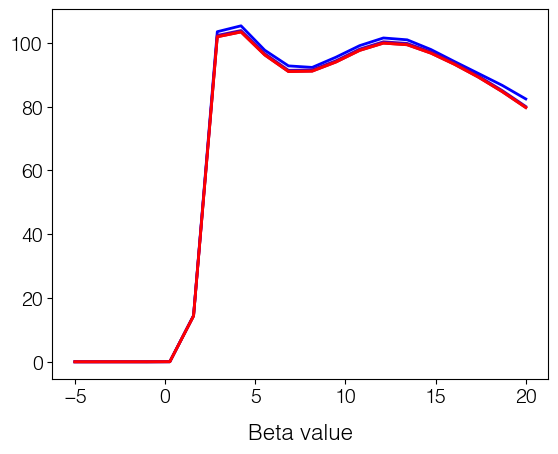

In [11]:
all_Ngaps = np.linspace(1,4,4)*12
Nkappas = 122
cs = bluered_colors(len(all_Ngaps))
for i,Ngaps in enumerate(all_Ngaps):

    print('Computing convergence round %i of %i'%(i+1, len(all_Ngaps)))

    signals_direct = P.getNormalizedSignal(freqs_wn,rp,
                                        a_nm=a_nm,amplitude_nm=A_nm,demod_order=5,
                                        Ngaps=Ngaps,gapmin_nm=gapmin_nm,
                                        rp_norm = M.Au.reflection_p,
                                        Nkappas=Nkappas,kappa_max=kappa_max)
    plt.plot(betas,np.abs(signals_direct['Sn_norm'][3]),
                          color=next(cs))
plt.xlabel('Beta value')

### kappa quadrature convergence

Computing convergence round 1 of 3
amplitude= 4e-06
gapmin= 5e-07
<ProbeCavityEigenfields.Probe.EradVsGap>:
	Computing response for 24 gaps at freq=500.0380248798995...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators at k=0...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.EradVsGap>:
	Computing response for 24 gaps at freq=526.3558156630521...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators at k=0...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.EradVsGap>:
	Computing response for 24 gaps at freq=552.6736064462048...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators at k=0...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.EradVsGap>:
	Computing response for 24 gaps at freq=578.9913972293573...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators at k=0.

Text(0.5, 0, 'Beta value')

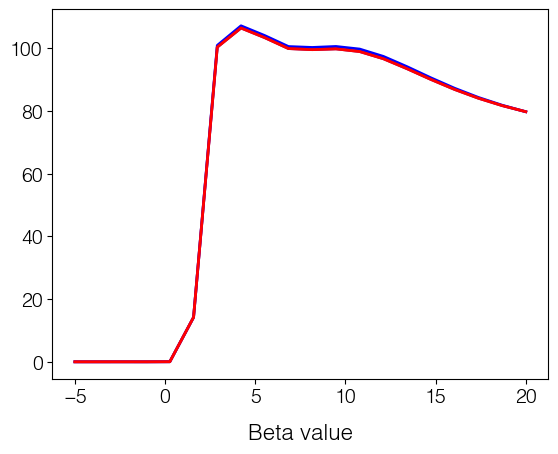

In [12]:
all_Nkappas = np.array([1,2,4])*244
Ngaps = 24
cs = bluered_colors(len(all_Nkappas))
for i,Nkappas in enumerate(all_Nkappas):

    print('Computing convergence round %i of %i'%(i+1, len(all_Nkappas)))

    signals_direct = P.getNormalizedSignal(freqs_wn,rp,
                                        a_nm=a_nm,amplitude_nm=A_nm,demod_order=5,
                                        Ngaps=Ngaps,gapmin_nm=gapmin_nm,
                                        rp_norm = M.Au.reflection_p,
                                        Nkappas=Nkappas,kappa_max=kappa_max)
    plt.plot(betas,np.abs(signals_direct['Sn_norm'][3]),
                          color=next(cs))
plt.xlabel('Beta value')

## Invertible Eigenfields - Ngaps convergence

Computing convergence round 1 of 6
amplitude= 4e-06
gapmin= 5e-07
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Nts= 12.0
Computing convergence round 2 of 6
amplitude= 4e-06
gapmin= 5e-07
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Nts= 19.200000000000003
Computing convergence round 3 of 6
amplitude= 4e-06
gapmin= 5e-07
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Nts= 26.400000000000002
Computing convergence round 4 of 6
amplitude= 4e-06
gapmin= 5e-07
Nts= 33.599999999999994
Nts= 33.59999999

Text(0.5, 0, 'Beta value')

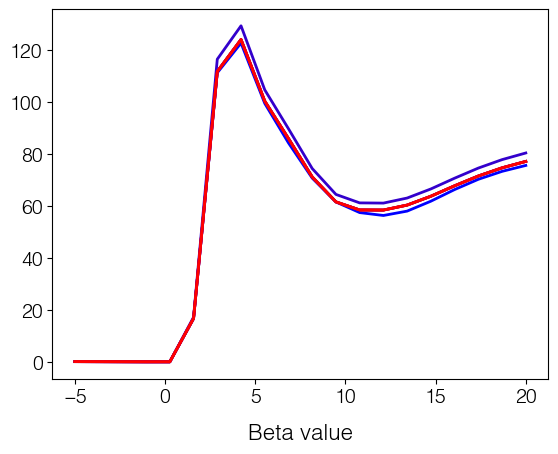

In [6]:
all_Ngaps = np.linspace(1,4,6)*12
cs = bluered_colors(len(all_Ngaps))

for i,Ngaps in enumerate(all_Ngaps):
    print('Computing convergence round %i of %i'%(i+1, len(all_Ngaps)))

    signals_IE = IE.getNormalizedSignal(betas,
                                        a_nm=a_nm,amplitude_nm=A_nm,demod_order=5,
                                        Ngaps=Ngaps,gapmin_nm=gapmin_nm,
                                        beta_norm = [1]*len(betas),
                                        max_harmonic=5,
                                        Nmodes=None)
    plt.plot(betas,np.abs(signals_IE['Sn_norm'][3]),
                          color=next(cs))

plt.xlabel('Beta value')

## Encoded Eigenfields - Ngaps convergence

Computing convergence round 1 of 6
amplitude= 4e-06
gapmin= 5e-07
	Computing at freq=5.000E+02...
	Computing at freq=5.264E+02...
	Computing at freq=5.527E+02...
	Computing at freq=5.790E+02...
	Computing at freq=6.053E+02...
	Computing at freq=6.316E+02...
	Computing at freq=6.579E+02...
	Computing at freq=6.843E+02...
	Computing at freq=7.106E+02...
	Computing at freq=7.369E+02...
	Computing at freq=7.632E+02...
	Computing at freq=7.895E+02...
	Computing at freq=8.159E+02...
	Computing at freq=8.422E+02...
	Computing at freq=8.685E+02...
	Computing at freq=8.948E+02...
	Computing at freq=9.211E+02...
	Computing at freq=9.474E+02...
	Computing at freq=9.738E+02...
	Computing at freq=1.000E+03...
<ProbeCavityEigenfields.ProbeSpectroscopy.EncodedEigenfields.EradSpectrumDemodulated>:
	Demodulating...
		Time elapsed: 2.6106059551239014
	Computing at freq=7.501E+02...
<ProbeCavityEigenfields.ProbeSpectroscopy.EncodedEigenfields.EradSpectrumDemodulated>:
	Demodulating...
		Time elapsed: 0.0

Text(0.5, 0, 'Beta value')

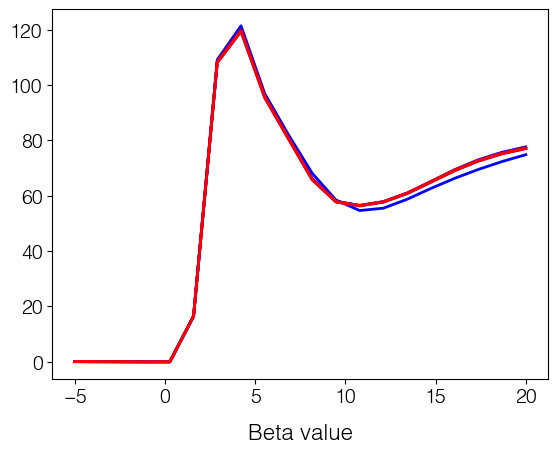

In [10]:
all_Ngaps = np.linspace(1,4,6)*12
cs = bluered_colors(len(all_Ngaps))
for i,Ngaps in enumerate(all_Ngaps):

    print('Computing convergence round %i of %i'%(i+1, len(all_Ngaps)))

    signals_enc = Enc.getNormalizedSignal(freqs_wn,rp,
                                        a_nm=a_nm,amplitude_nm=A_nm,demod_order=5,
                                        Ngaps=Ngaps,gapmin_nm=gapmin_nm,
                                        L_cm=24e-4,
                                        rp_norm = M.Au.reflection_p,
                                        norm_single_Freq = True)
    plt.plot(betas,np.abs(signals_enc['Sn_norm'][3]),
                          color=next(cs))
plt.xlabel('Beta value')

# Compute calibration curves for probe

In [21]:
amplitude_factors=np.linspace(.1,5.5,20)
gapmin_factors=np.linspace(.1,1,20)

Ngaps=24*2

all_s3s_si=[]
all_s2s_si=[]
all_s3s_au=[]
all_s2s_au=[]
for i,gapmin_factor in enumerate(gapmin_factors):
    gapmin_nm = a_nm*gapmin_factor

    these_s3s_si=[]
    these_s2s_si=[]
    these_s3s_au=[]
    these_s2s_au=[]
    
    for j,amp_factor in enumerate(amplitude_factors):
        print('Working on calculation %i of %i'%(j+1+i*len(amplitude_factors),
                                                 len(amplitude_factors)*len(gapmin_factors)))
        A_nm = a_nm*amp_factor
    
        signals_si = IE.getNormalizedSignal(M.Si.reflection_p(1000,q=1/10e-7),
                                            a_nm=a_nm,amplitude_nm=A_nm,demod_order=5,
                                            Ngaps=Ngaps,gapmin_nm=gapmin_nm,
                                            beta_norm = None,
                                            max_harmonic=5,
                                            Nmodes=None)
        signals_au = IE.getNormalizedSignal(1,
                                            a_nm=a_nm,amplitude_nm=A_nm,demod_order=5,
                                            Ngaps=Ngaps,gapmin_nm=gapmin_nm,
                                            beta_norm = None,
                                            max_harmonic=5,
                                            Nmodes=None)
        these_s3s_si.append(signals_si['Sn'][3])
        these_s2s_si.append(signals_si['Sn'][2])
        these_s3s_au.append(signals_au['Sn'][3])
        these_s2s_au.append(signals_au['Sn'][2])
        
    all_s3s_si.append(these_s3s_si)
    all_s2s_si.append(these_s2s_si)
    all_s3s_au.append(these_s3s_au)
    all_s2s_au.append(these_s2s_au)

Working on calculation 1 of 400
amplitude= 2e-07
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
amplitude= 2e-07
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Working on calculation 2 of 400
amplitude= 7.684210526315789e-07
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
amplitude= 7.684210526315789e-07
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Working on calculation 3 of 400
amplitude= 1.336842105263158e-06
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
amplitude= 1.336842105263158e-06
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Working on calculation 4 of 400
amplitude= 1.9052631578947366e-06
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
amplitude= 1.9052631578947366e-06
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Working on calculation 5 of 400
amplitude= 2.4736842105263156e-06
gapmin= 2e-07
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
Nts= 48
amplitude= 2.4

In [22]:
all_s3s_si = AWA(all_s3s_si,axes=[gapmin_factors,amplitude_factors],
                 axis_names=['gapmin / a','A/a'])
all_s2s_si = AWA(all_s2s_si,axes=[gapmin_factors,amplitude_factors],
                 axis_names=['gapmin / a','A/a'])
all_s3s_au = AWA(all_s3s_au,axes=[gapmin_factors,amplitude_factors],
                 axis_names=['gapmin / a','A/a'])
all_s2s_au = AWA(all_s2s_au,axes=[gapmin_factors,amplitude_factors],
                 axis_names=['gapmin / a','A/a'])

In [29]:
all_s3divs2s_au = all_s3s_au/all_s2s_au
all_s3divs2s_si = all_s3s_si/all_s2s_si

all_s3divs2s_au = all_s3s_au/all_s2s_au

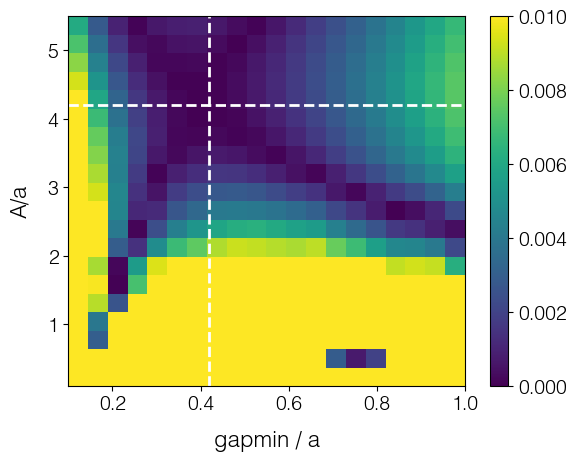

In [94]:
s3_au_rel_si_target  = 2.1/1.2
s3divs2_si_target= 0.3

diff1 = np.abs(all_s3au_rel_s3si)-s3_au_rel_si_target
diff2 = np.abs(all_s3divs2s_si)-s3divs2_si_target

np.abs(diff1*diff2).plot()
plt.clim(0,.01)

gapmin = .42
A = 4.2

plt.axhline(A,color='w',ls='--')
plt.axvline(gapmin,color='w',ls='--')